In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.
/home/ab/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


57344/57026 [==============================] - 4s 61us/step


In [2]:
import numpy as np

In [3]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics

In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
train_data[0]

array([   1.23247,    0.     ,    8.14   ,    0.     ,    0.538  ,
          6.142  ,   91.7    ,    3.9769 ,    4.     ,  307.     ,
         21.     ,  396.9    ,   18.72   ])

Let us normalize all the coloums

In [7]:
mean = train_data.mean(axis=0)

In [10]:
train_data -= mean
std = train_data.std(axis=0)

In [11]:
train_data /= std

In [12]:
test_data -= mean
test_data /= std

In [13]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [25]:
def get_model(train_data):
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=((train_data.shape[1],))))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer=optimizers.rmsprop(lr=0.001),loss=losses.mse,metrics=[metrics.mae])
    return model

In [43]:
def k_fold(train_data, label, folds = 3,epochs=100):
    k = folds
    num_of_sample = len(label)//k
    epochs = epochs
    val_result = []
    train_result = []
    for i in range(k):
        print('Performing ', i, ' Folds')
        # Create the validation set
        val_train = train_data[i* num_of_sample : (i+1)*num_of_sample]
        val_label = label[i* num_of_sample : (i+1)*num_of_sample]
        
        # Create the tranning Set
        
        x_train = np.concatenate([ train_data[: i*num_of_sample], train_data[(i+1)*num_of_sample: ]], axis=0)
        y_train = np.concatenate([ label[: i*num_of_sample], label[(i+1)*num_of_sample: ]], axis=0)
  
        print(x_train.shape, '\t', y_train.shape)
        print(val_train.shape, '\t', val_label.shape)
        
        model = get_model(x_train)
        history = model.fit(x_train,y_train,batch_size=1,epochs=epochs,verbose=0,validation_data=(val_train,val_label))
        val_result.append(history.history['val_mean_absolute_error'])
        train_result.append(history.history['mean_absolute_error'])
    return val_result, train_result

In [64]:
result = k_fold(train_data=train_data,label=train_targets,folds=5,epochs=100)

Performing  0  Folds
(324, 13) 	 (324,)
(80, 13) 	 (80,)
Performing  1  Folds
(324, 13) 	 (324,)
(80, 13) 	 (80,)
Performing  2  Folds
(324, 13) 	 (324,)
(80, 13) 	 (80,)
Performing  3  Folds
(324, 13) 	 (324,)
(80, 13) 	 (80,)
Performing  4  Folds
(324, 13) 	 (324,)
(80, 13) 	 (80,)


In [80]:
avg_val_result = [
    np.mean([x[i] for x in result[0]])
    for i in range(100)]

In [81]:
avg_train_result = [
    np.mean([x[i] for x in result[1]])
    for i in range(100)
]

In [82]:
import matplotlib.pyplot as plt

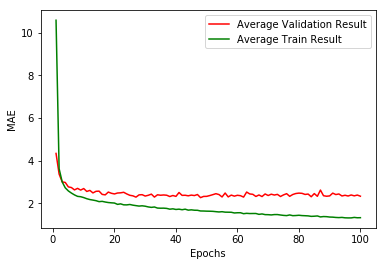

In [83]:
plt.plot(range(1, 101), avg_val_result, 'r',label="Average Validation Result")
plt.plot(range(1,101),avg_train_result,'g',label='Average Train Result')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

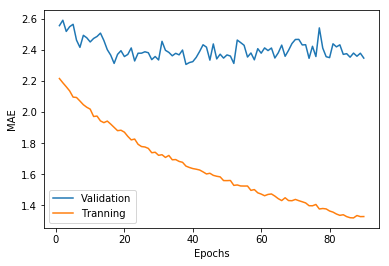

In [84]:
def smooth_curve(points, factor=0.3):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(avg_val_result[10:])
smooth_mae_history1 = smooth_curve(avg_train_result[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history,label="Validation")
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history1,label='Tranning')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()